<a href="https://colab.research.google.com/github/merrymasti015/CAP2022GRP09/blob/main/PCAMZC321_Group09_FireEventDetection_CNN_with_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Convolutional Neural Network          
### How CNN will be using SVM for image classification 
### For multiclass claasification , SVM can be used with some modification


In [ ]:
# Convolutional Neural Network

# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

ModelSaveFolder = "/content/gdrive/MyDrive/Fire_ImageDataSet/ModelSave"


Drive = "/content/gdrive/MyDrive/"
## Define root folder
RootFolder = Drive+"Fire_ImageDataSet/OutputFiles"

### Where to save models

ModelSaveFolder = Drive+"Fire_ImageDataSet/ModelSave"

print(ModelSaveFolder)

Mounted at /content/gdrive
/content/gdrive/MyDrive/Fire_ImageDataSet/ModelSave


In [ ]:
tf.__version__

'2.8.0'

In [ ]:
import os                                     # operating system 
import numpy as np                            # linear algebra 
from PIL import Image                         # Python image library 
import matplotlib.pyplot as plt               # making plots
%matplotlib inline 
from IPython.display import display           # displaying ?


In [ ]:
base_dir = '/content/gdrive/MyDrive/Fire_ImageDataSet/OutputFiles/BaseDataSet'

train_dir = os.path.join(base_dir, 'Train')
train_dir_fire = os.path.join(train_dir, 'Fire')
train_dir_nofire = os.path.join(train_dir, 'Neutral')

test_dir = os.path.join(base_dir, 'Test')
test_dir_fire = os.path.join(test_dir, 'Fire')
test_dir_nofire = os.path.join(test_dir, 'Neutral')

In [ ]:
list = os.listdir(train_dir_fire) # dir directory path
number_files = len(list)
print(number_files)

875


In [ ]:
list = os.listdir(train_dir_nofire) # dir directory path
number_files = len(list)
print(number_files)

900


In [ ]:
list = os.listdir(test_dir_fire) # dir directory path
number_files = len(list)
print(number_files)

97


In [ ]:
list = os.listdir(test_dir_nofire) # dir directory path
number_files = len(list)
print(number_files)

90


## Data Preprocessing - Data augmentation on the train data:

In [ ]:
# Part 1 - Data Preprocessing - Image augmentation on the train data:

# Preprocessing the Training set
#train_datagen = ImageDataGenerator(rescale = 1./255,
                                   #shear_range = 0.2,
                                   #zoom_range = 0.2,
                                   #horizontal_flip = True)

train_datagen = ImageDataGenerator(rescale=1./255,        # scaling 
                                  rotation_range=40,      # randomly rotate images in the range (degrees, 0 to 180)
                                  width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
                                  height_shift_range=0.2, # randomly shift images vertically (fraction of total height)
                                  shear_range=0.2,        # randomly applying shearing transformations
                                  zoom_range=0.2,         # Randomly zoom image
                                  horizontal_flip=True)   # randomly flip images
                                  ## https://keras.io/api/preprocessing/image/ - check this link for all options

In [ ]:
training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 1775 images belonging to 2 classes.
Found 187 images belonging to 2 classes.


### Building the CNN 

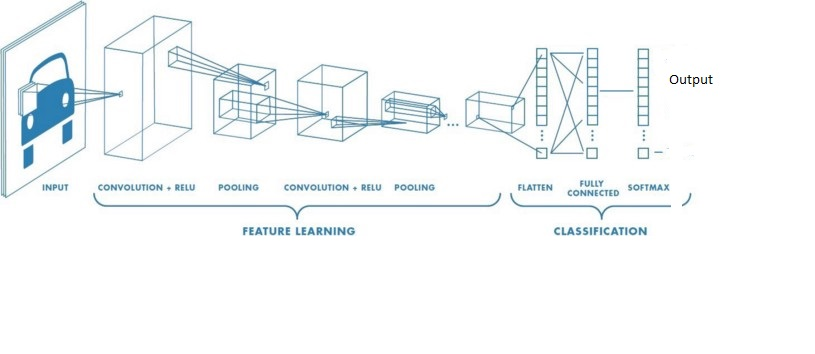

In [ ]:
from IPython import display
display.Image("/content/gdrive/MyDrive/ANN_architecture.jpg")

### Artificial Neural Networks, made up of multiple neurons is not capable of extracting features from the image. This is where a combination of convolution and pooling layers comes into the picture

In [ ]:
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from tensorflow.keras.layers import Dense
from keras import models, layers, optimizers   

In [ ]:
from tensorflow.keras.regularizers import l2

## Define the Model 

In [ ]:
## Let’s define a simple CNN model with 3 Convolutional layers followed by max-pooling layers. 
# A dropout layer is added after the 3rd maxpool operation to avoid overfitting.

# Part 2 - Building the CNN
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32 ,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a third convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

## Adding Dropout
cnn.add(Dropout(0.4))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

cnn.add(tf.keras.layers.Dense(2, activation="softmax"))  # model_output_size = 2 - No of classes

### ReLU or rectified linear unit is a process of applying an activation function to increase the non-linearity of the network without affecting the receptive fields of convolution layers.


### The general objective of the convolution operation is to extract high-level features from the image. We can always add more than one convolution layer when building the neural network, where the first Convolution Layer is responsible for capturing gradients whereas the second layer captures the edges. The addition of layers depends on the complexity of the image hence there are no magic numbers on how many layers to add.


## Role of the Pooling Layer
### The pooling layer applies a non-linear down-sampling on the convolved feature often referred to as the activation maps. This is mainly to reduce the computational complexity required to process the huge volume of data linked to an image. Pooling is not compulsory and is often avoided. Usually, there are two types of pooling, Max Pooling, that returns the maximum value from the portion of the image covered by the Pooling Kernel and the Average Pooling that averages the values covered by a Pooling Kernel. 

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [ ]:

from tensorflow.keras.optimizers import Adam

In [ ]:
# Let's train the model using RMSprop
cnn.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## train the model

In [ ]:
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 50)

Epoch 1/50
56/56 [==============================] - 580s 10s/step - loss: 0.5801 - accuracy: 0.6963 - val_loss: 0.4451 - val_accuracy: 0.7807
Epoch 2/50
56/56 [==============================] - 11s 192ms/step - loss: 0.4064 - accuracy: 0.8282 - val_loss: 0.3608 - val_accuracy: 0.8770
Epoch 3/50
56/56 [==============================] - 11s 192ms/step - loss: 0.3123 - accuracy: 0.8800 - val_loss: 0.4083 - val_accuracy: 0.7861
Epoch 4/50
56/56 [==============================] - 11s 193ms/step - loss: 0.3027 - accuracy: 0.8873 - val_loss: 0.2918 - val_accuracy: 0.9037
Epoch 5/50
56/56 [==============================] - 11s 194ms/step - loss: 0.2238 - accuracy: 0.9200 - val_loss: 0.2556 - val_accuracy: 0.9144
Epoch 6/50
56/56 [==============================] - 11s 192ms/step - loss: 0.2007 - accuracy: 0.9183 - val_loss: 0.2609 - val_accuracy: 0.9037
Epoch 7/50
56/56 [==============================] - 11s 191ms/step - loss: 0.2018 - accuracy: 0.9239 - val_loss: 0.2985 - val_accuracy: 0.9037


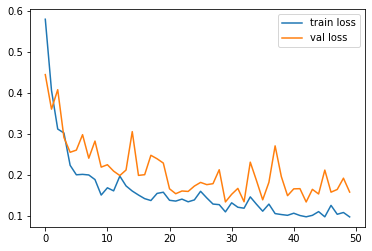

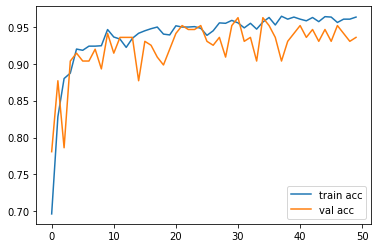

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

### Overall 92% accuracy 

### Model save

In [ ]:
model_name = 'CNN_epochs50.h5'

cnn.save(ModelSaveFolder+'/'+model_name)

In [ ]:
from tensorflow import keras
model_name = 'CNN_epochs50.h5'
CNN_epochs50 = keras.models.load_model(ModelSaveFolder+'/'+model_name)

In [ ]:
len(test_set)



6

In [ ]:
# taking first batch from the generator 
img, label = test_set[5] 
print(label)
print(img[0])

[0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0.
 0. 1. 1.]
[[[0.38823533 0.6666667  0.8862746 ]
  [0.40000004 0.6784314  0.8980393 ]
  [0.40000004 0.6784314  0.8980393 ]
  ...
  [0.427451   0.25882354 0.23137257]
  [0.40784317 0.2392157  0.21176472]
  [0.3803922  0.22352943 0.19215688]]

 [[0.39607847 0.6745098  0.8941177 ]
  [0.40784317 0.6862745  0.9058824 ]
  [0.40784317 0.6862745  0.9058824 ]
  ...
  [0.40784317 0.2509804  0.21960786]
  [0.3921569  0.23529413 0.20392159]
  [0.3803922  0.22352943 0.19215688]]

 [[0.4039216  0.68235296 0.90196085]
  [0.4156863  0.69411767 0.91372555]
  [0.4156863  0.69411767 0.91372555]
  ...
  [0.39607847 0.2509804  0.21568629]
  [0.37647063 0.23137257 0.19607845]
  [0.3803922  0.22352943 0.19215688]]

 ...

 [[0.5764706  0.56078434 0.46274513]
  [0.5882353  0.57254905 0.47450984]
  [0.6        0.58431375 0.48627454]
  ...
  [0.79215693 0.5254902  0.04313726]
  [0.7843138  0.5176471  0.03529412]
  [0.79215693 0.5176471  0.07

In [ ]:
# taking first batch from the generator 
img, label = test_set[0] 

# Predicting the images from the first batch 
pred = np.round(CNN_epochs50.predict(img)).flatten()

In [ ]:
len(img)

32

In [ ]:
pred


array([1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0.], dtype=float32)

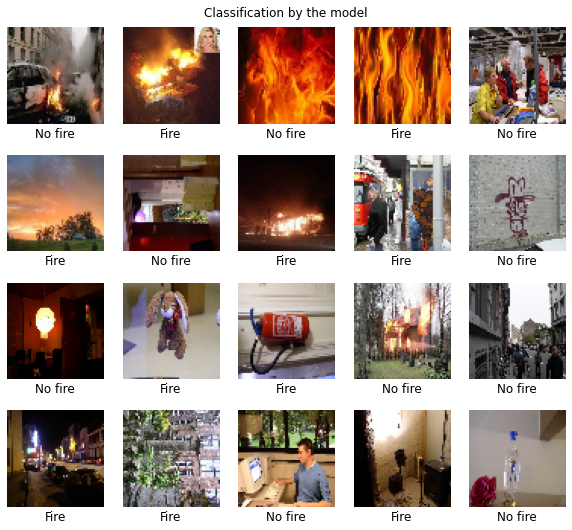

In [ ]:
# Numeric to semantic labels 
label_dict = {1.0: 'No fire', 0.0: 'Fire'}

# Generating collage of plots 
fig = plt.figure(figsize=(10, 9))
plt.title('Classification by the model')
plt.axis('off')

for i, img_i in enumerate(img[:20]):
    ax = fig.add_subplot(4, 5, i+1)
    plt.axis('off')
    plt.title(label_dict[pred[i]], y=-0.2)
    ax.imshow(img_i)

## Apply On Unlabeled images 

In [ ]:
import matplotlib.image as mpimg  # To view  image 
from pathlib import Path

In [ ]:
## Define root folder
RootFolder = Drive+"/Fire_ImageDataSet/ApplySet"

In [ ]:
imageFolder = os.path.join(RootFolder , '')
imageFolder

'/content/gdrive/MyDrive//Fire_ImageDataSet/ApplySet/'

In [ ]:
def image_collage(path, n_rows, n_cols, title ,pred , pred_results):
    
    '''This function selects the first few images from given 
    path and presents in the collage form. 
    path is the directory from which images are taken. 
    n_rows and n_cols are rows and column of the collage. 
    title is the title of the collage.
    imageType - to indicate colur(C) or grey (G)'''
    
    # Initiating the plot 
    fig = plt.figure()
    plt.title(title)
    
    # Turns off axis from the collage (total plot)
    plt.axis('Off')
    
    # List of all images in the path
    img_list = os.listdir(path)
    # Numeric to semantic labels 
    label_dict = {0: 'fire', 1: 'No Fire'}
    img_num = 1
    i=0
    for img in img_list:
        
        # directroies of the choosen images 
        img_path = os.path.join(path, img)
        print(img_path)
        # showing the color images 
        #img_read = mpimg.imread(img_path)
        img_read = mpimg.imread(img_path)
        

       # collage is formed from subplot
        ax = fig.add_subplot(n_rows, n_cols, img_num)
        img_num += 1
        temp = Path(img_path).stem # Find file name without extension
        if pred_results == 'Y':   ### for printing prediction output
            prediction  = label_dict[pred[i]]
            temp = temp+"(" + prediction + ')'
            i=i+1
                                                                         
        #plt.title(temp)
        # displaying image in subplot 
        ax.imshow(img_read)
        ax.text(5, 5, temp, bbox=dict(facecolor='white', alpha=0.8))
        
        # turns off the axis from individual image in the collage
        ax.axis('Off')

/content/gdrive/MyDrive//Fire_ImageDataSet/ApplySet/fire1.jpg
/content/gdrive/MyDrive//Fire_ImageDataSet/ApplySet/fire2.jpg
/content/gdrive/MyDrive//Fire_ImageDataSet/ApplySet/neutral1.jpg
/content/gdrive/MyDrive//Fire_ImageDataSet/ApplySet/neutral2.jpg


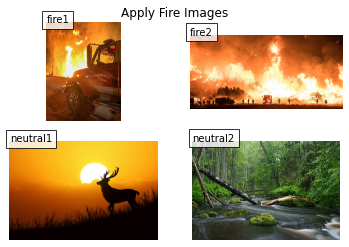

In [ ]:
pred_results = 'N'
pred = 0
image_collage(imageFolder,2,2,'Apply Fire Images' , pred, pred_results )

In [ ]:
from keras.preprocessing import image

In [ ]:
###  predict_on_Apply_Image
def  predict_on_Apply_Image_CNN_Extracted(path , model):
    

     prediction_images = []
     base_images = []
     # Numeric to semantic labels 
     #label_dict = {0: 'fire', 1: 'No Fire'}
     i = 0
     
     # List of all images in the path
     img_list = os.listdir(path)

     for Imagefile in img_list:
            # directroies of the choosen images 
            img_path = os.path.join(path, Imagefile)
            # # loading the image and keeping the target size as (64, 64, 3)
            img = image.load_img(img_path, target_size=(64, 64, 3))
            base_images.append(img_path)
            #base_images.append(img)
            img = image.img_to_array(img)
            # normalizing the pixel value
            img = img/255
            # appending the image to the image list
            prediction_images.append(img)
            #print("Prediction:" , prediction_images)
     
     # converting the list to numpy array
     prediction_images = np.array(prediction_images)
     #print(prediction_images.shape)
     # predicting class for each array
     predict_x=model.predict(prediction_images)
     pred = np.argmax(predict_x,axis=1)
      
     print(pred)
     return pred

In [ ]:
prediction = predict_on_Apply_Image_CNN_Extracted(imageFolder,CNN_epochs50)

[0 0 0 1]


/content/gdrive/MyDrive//Fire_ImageDataSet/ApplySet/fire1.jpg
/content/gdrive/MyDrive//Fire_ImageDataSet/ApplySet/fire2.jpg
/content/gdrive/MyDrive//Fire_ImageDataSet/ApplySet/neutral1.jpg
/content/gdrive/MyDrive//Fire_ImageDataSet/ApplySet/neutral2.jpg


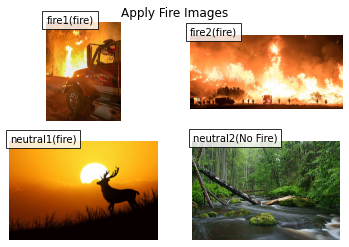

In [ ]:
pred_results = 'Y'
image_collage(imageFolder,2,2,'Apply Fire Images' ,prediction ,  pred_results )


### Another Set 

In [ ]:
imageFolder = Drive+"/Fire_ImageDataSet/ApplySet1"

/content/gdrive/MyDrive//Fire_ImageDataSet/ApplySet1/TF_image_99.jpg
/content/gdrive/MyDrive//Fire_ImageDataSet/ApplySet1/TN_image_98.jpg
/content/gdrive/MyDrive//Fire_ImageDataSet/ApplySet1/TN_image_97.jpg
/content/gdrive/MyDrive//Fire_ImageDataSet/ApplySet1/TN_image_96.jpg


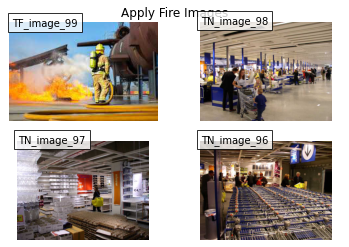

In [ ]:
pred_results = 'N'
pred = 0
image_collage(imageFolder,2,2,'Apply Fire Images' , pred, pred_results )

In [ ]:
prediction = predict_on_Apply_Image_CNN_Extracted(imageFolder,CNN_epochs50)

[0 1 1 1]


/content/gdrive/MyDrive//Fire_ImageDataSet/ApplySet1/TF_image_99.jpg
/content/gdrive/MyDrive//Fire_ImageDataSet/ApplySet1/TN_image_98.jpg
/content/gdrive/MyDrive//Fire_ImageDataSet/ApplySet1/TN_image_97.jpg
/content/gdrive/MyDrive//Fire_ImageDataSet/ApplySet1/TN_image_96.jpg


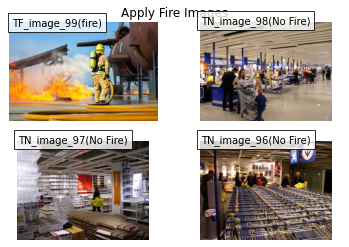

In [ ]:
pred_results = 'Y'
image_collage(imageFolder,2,2,'Apply Fire Images' ,prediction ,  pred_results )


## End - Next SVM

## ADD SVM as Final Layer

In [ ]:
from tensorflow.keras.regularizers import l2

In [ ]:
# Part 2 - Building the CNN
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))



## This line commented 
# cnn.add(tf.keras.layers.Dense(2, activation="softmax"))  # model_output_size = 2 - No of classes

## For Binary Classification - Adding SVM with L2 norm as .01 value ..... # Read about SVM

cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

## Activation Function here is linear as it's a binary classification - Linear SVM . 

## for mulitclassification - not applicable for binary class
###  Activation Function = softmax
#cnn.add(Dense(4, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation='softmax'))
#cnn.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])

In [ ]:
# Compiling the CNN_SVM
## loss = 'hinge' means it act as SVM layer
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])


## So there are 2 changes - to make last layer as a SVM layer 

In [ ]:
# Part 3 - Training the CNN

# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15
56/56 [==============================] - 12s 196ms/step - loss: 0.6598 - accuracy: 0.7042 - val_loss: 0.4559 - val_accuracy: 0.7861
Epoch 2/15
56/56 [==============================] - 11s 197ms/step - loss: 0.4104 - accuracy: 0.8394 - val_loss: 0.4058 - val_accuracy: 0.8342
Epoch 3/15
56/56 [==============================] - 11s 192ms/step - loss: 0.3267 - accuracy: 0.8563 - val_loss: 0.3254 - val_accuracy: 0.9037
Epoch 4/15
56/56 [==============================] - 11s 194ms/step - loss: 0.2522 - accuracy: 0.8958 - val_loss: 0.2737 - val_accuracy: 0.9198
Epoch 5/15
56/56 [==============================] - 11s 191ms/step - loss: 0.2869 - accuracy: 0.8749 - val_loss: 0.2784 - val_accuracy: 0.9251
Epoch 6/15
56/56 [==============================] - 11s 193ms/step - loss: 0.2430 - accuracy: 0.8980 - val_loss: 0.2740 - val_accuracy: 0.9198
Epoch 7/15
56/56 [==============================] - 11s 193ms/step - loss: 0.2329 - accuracy: 0.9082 - val_loss: 0.3291 - val_accuracy: 0.8984

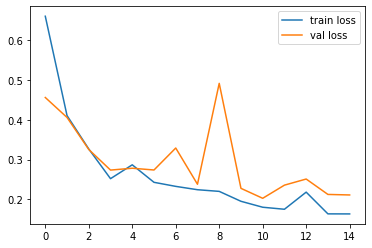

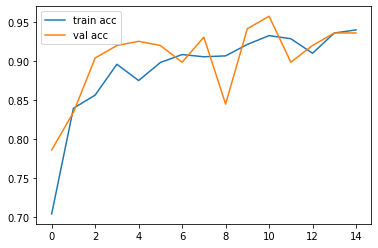

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 200)

Epoch 1/200
56/56 [==============================] - 11s 196ms/step - loss: 0.1711 - accuracy: 0.9352 - val_loss: 0.1946 - val_accuracy: 0.9412
Epoch 2/200
56/56 [==============================] - 11s 192ms/step - loss: 0.1701 - accuracy: 0.9262 - val_loss: 0.2231 - val_accuracy: 0.9412
Epoch 3/200
56/56 [==============================] - 11s 194ms/step - loss: 0.1564 - accuracy: 0.9346 - val_loss: 0.1897 - val_accuracy: 0.9412
Epoch 4/200
56/56 [==============================] - 11s 193ms/step - loss: 0.1726 - accuracy: 0.9273 - val_loss: 0.2116 - val_accuracy: 0.9412
Epoch 5/200
56/56 [==============================] - 11s 192ms/step - loss: 0.1619 - accuracy: 0.9375 - val_loss: 0.1856 - val_accuracy: 0.9305
Epoch 6/200
56/56 [==============================] - 11s 193ms/step - loss: 0.1542 - accuracy: 0.9341 - val_loss: 0.1845 - val_accuracy: 0.9519
Epoch 7/200
56/56 [==============================] - 11s 192ms/step - loss: 0.1569 - accuracy: 0.9363 - val_loss: 0.1899 - val_accuracy:

### Overall 94% accuracy 

In [ ]:
model_name = 'CNN_Using_SVM_epoch200.h5'

cnn.save(ModelSaveFolder+'/'+model_name)

In [ ]:
from tensorflow import keras
model_name = 'CNN_Using_SVM_epoch200.h5'
CNN_Using_SVM_epoch200 = keras.models.load_model(ModelSaveFolder+'/'+model_name)

In [ ]:
len(test_set)



6

In [ ]:
# taking first batch from the generator 
img, label = test_set[5] 
print(label)
print(img)

[0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 0.]
[[[[0.5686275  0.4666667  0.4156863 ]
   [0.6117647  0.50980395 0.4431373 ]
   [0.627451   0.5294118  0.4431373 ]
   ...
   [0.7294118  0.8078432  0.85098046]
   [0.7372549  0.81568635 0.8588236 ]
   [0.7254902  0.80392164 0.8470589 ]]

  [[0.54509807 0.45098042 0.4039216 ]
   [0.5882353  0.49803925 0.43529415]
   [0.6117647  0.5254902  0.4431373 ]
   ...
   [0.7490196  0.82745105 0.8705883 ]
   [0.7176471  0.7960785  0.83921576]
   [0.7058824  0.7843138  0.82745105]]

  [[0.52156866 0.4431373  0.40784317]
   [0.56078434 0.48627454 0.43137258]
   [0.5686275  0.49411768 0.427451  ]
   ...
   [0.68235296 0.7607844  0.80392164]
   [0.67058825 0.7490196  0.79215693]
   [0.6627451  0.7411765  0.7843138 ]]

  ...

  [[0.3803922  0.3647059  0.36862746]
   [0.41960788 0.4039216  0.40784317]
   [0.4666667  0.45098042 0.454902  ]
   ...
   [0.4156863  0.4431373  0.4666667 ]
   [0.47450984 0.4901961  0.5019608 ]
 

In [ ]:
# taking first batch from the generator 
img, label = test_set[0] 

# Predicting the images from the first batch 
pred = CNN_Using_SVM_epoch200.predict(img)
#pred = np.round(cnn.predict(img))

#predp = np.round(cnn.predict(img)).flatten()


In [ ]:
len(img)

32

In [ ]:
pred


array([[-11.198145  ],
       [ -7.1580253 ],
       [ -3.656373  ],
       [  4.2238746 ],
       [  3.9445827 ],
       [  2.2983882 ],
       [  3.1799123 ],
       [  2.0978234 ],
       [ -9.705951  ],
       [ -2.9784064 ],
       [  7.481369  ],
       [  1.3327978 ],
       [  4.612174  ],
       [ -2.1921587 ],
       [ -8.135212  ],
       [ -5.5772758 ],
       [  4.1425667 ],
       [ -4.3548374 ],
       [  1.6336344 ],
       [  2.8385055 ],
       [  0.2009472 ],
       [ -1.3346179 ],
       [  3.6785903 ],
       [  4.1125946 ],
       [ -6.618372  ],
       [ -5.928739  ],
       [  0.15108974],
       [ -4.365376  ],
       [  4.6350665 ],
       [ -2.9308286 ],
       [  3.5567877 ],
       [  2.5345478 ]], dtype=float32)

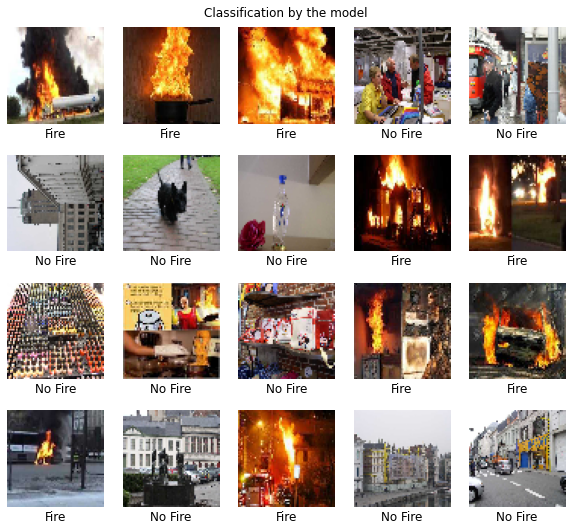

In [ ]:


# Generating collage of plots 
fig = plt.figure(figsize=(10, 9))
plt.title('Classification by the model')
plt.axis('off')

for i, img_i in enumerate(img[:20]):
    ax = fig.add_subplot(4, 5, i+1)
    plt.axis('off')
    if pred[i]<0:
        Model_Predict = 'Fire'
    else:
        Model_Predict = 'No Fire'
    
    plt.title(Model_Predict,y=-0.2)
    ax.imshow(img_i)

In [ ]:
len(test_set)

6

In [ ]:
import itertools

# Lists for missed fire images and missed non-fire images
msd_fire = []
msd_nofire = []

# Iterating through all the batches 
#for j in range(31):
for j in range(len(test_set)):
    print(j)
    img, label = test_set[j] 
    pred = np.round(CNN_Using_SVM_epoch200.predict(img)).flatten()
    
    # bool_list is False when there is misclassification
    bool_list = (label == pred)
    print (bool_list[0])
    for i, e in enumerate(bool_list):
        if e == False:
            
            # separating labels (fire and non-fire)
            if label[i] == 0:
                msd_fire.append(img[i])
            else:
                msd_nofire.append(img[i])

0
False
1
False
2
False
3
True
4
False
5
False


In [ ]:
len(msd_fire)

92

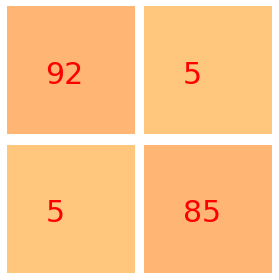

In [ ]:
# total number of sample in test set in each class 
n_classFire    = 97
n_classNeutral = 90

# number of misclassified fire and non-fire images 
nm_fire, nm_nofire = len(msd_fire), len(msd_nofire)

# confusion matrix (flattened)
conf_mat = [nm_fire,n_classFire-nm_fire,n_classNeutral-nm_nofire, nm_nofire, ]

# visualization of confusion matrix 
fig = plt.figure(figsize=(4, 4))
for i, j in enumerate(conf_mat):
    ax = fig.add_subplot(2, 2, i+1)
    ax.imshow([[j]], vmin=0, vmax=1000, cmap='copper_r')
    ax.text(-0.2, 0.1, j, c='r', fontsize=30)
    ax.axis('off')

# bringing blocks tighter 
fig.tight_layout()
fig.show()

In [ ]:
n_classFire-nm_fire

5

## Apply On Unlabeled images 

In [ ]:
import matplotlib.image as mpimg  # To view  image 
from pathlib import Path

In [ ]:
imageFolder = Drive+"/Fire_ImageDataSet/ApplySet"
imageFolder

'/content/gdrive/MyDrive//Fire_ImageDataSet/ApplySet'

/content/gdrive/MyDrive//Fire_ImageDataSet/ApplySet/fire1.jpg
/content/gdrive/MyDrive//Fire_ImageDataSet/ApplySet/fire2.jpg
/content/gdrive/MyDrive//Fire_ImageDataSet/ApplySet/neutral1.jpg
/content/gdrive/MyDrive//Fire_ImageDataSet/ApplySet/neutral2.jpg


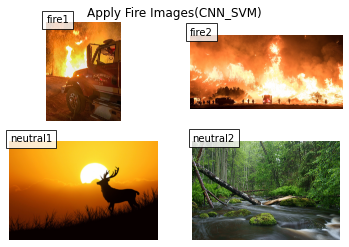

In [ ]:
pred_results = 'N'
ModelName = 'CNN_SVM'
Title = 'Apply Fire Images'+'('+ ModelName +')'
pred = 0
image_collage(imageFolder,2,2,Title , pred, pred_results )

In [ ]:
from keras.preprocessing import image

In [ ]:
###  predict_on_Apply_Image
def  predict_on_Apply_Image_CNN_Extracted(path , model):
    

     prediction_images = []
     base_images = []
     # Numeric to semantic labels 
     #label_dict = {0: 'fire', 1: 'No Fire'}
     i = 0
     
     # List of all images in the path
     img_list = os.listdir(path)

     for Imagefile in img_list:
            # directroies of the choosen images 
            img_path = os.path.join(path, Imagefile)
            # # loading the image and keeping the target size as (64, 64, 3)
            img = image.load_img(img_path, target_size=(64, 64, 3))
            base_images.append(img_path)
            #base_images.append(img)
            img = image.img_to_array(img)
            # normalizing the pixel value
            img = img/255
            # appending the image to the image list
            prediction_images.append(img)
            #print("Prediction:" , prediction_images)
     
     # converting the list to numpy array
     prediction_images = np.array(prediction_images)
     #print(prediction_images.shape)
     # predicting class for each array
     predict_x=model.predict(prediction_images)
     pred = np.argmax(predict_x,axis=1)
     print(pred)
     return pred

In [ ]:
def image_collage(path, n_rows, n_cols, title ,pred , pred_results):
    
    '''This function selects the first few images from given 
    path and presents in the collage form. 
    path is the directory from which images are taken. 
    n_rows and n_cols are rows and column of the collage. 
    title is the title of the collage.
    imageType - to indicate colur(C) or grey (G)'''
    
    # Initiating the plot 
    fig = plt.figure()
    plt.title(title)
    
    # Turns off axis from the collage (total plot)
    plt.axis('Off')
    
    # List of all images in the path
    img_list = os.listdir(path)
    # Numeric to semantic labels 
    label_dict = {0: 'fire', 1: 'No Fire'}
    img_num = 1
    i=0
    for img in img_list:
        
        # directroies of the choosen images 
        img_path = os.path.join(path, img)
        print(img_path)
        # showing the color images 
        #img_read = mpimg.imread(img_path)
        img_read = mpimg.imread(img_path)
        

       # collage is formed from subplot
        ax = fig.add_subplot(n_rows, n_cols, img_num)
        img_num += 1
        temp = Path(img_path).stem # Find file name without extension
        if pred_results == 'Y':   ### for printing prediction output
            prediction  = label_dict[pred[i]]
            temp = temp+"(" + prediction + ')'
            i=i+1
                                                                         
        #plt.title(temp)
        # displaying image in subplot 
        ax.imshow(img_read)
        ax.text(5, 5, temp, bbox=dict(facecolor='white', alpha=0.8))
        
        # turns off the axis from individual image in the collage
        ax.axis('Off')

In [ ]:
prediction = predict_on_Apply_Image_CNN_Extracted(imageFolder,CNN_Using_SVM_epoch200)

[0 0 0 0]


/content/gdrive/MyDrive//Fire_ImageDataSet/ApplySet/fire1.jpg
/content/gdrive/MyDrive//Fire_ImageDataSet/ApplySet/fire2.jpg
/content/gdrive/MyDrive//Fire_ImageDataSet/ApplySet/neutral1.jpg
/content/gdrive/MyDrive//Fire_ImageDataSet/ApplySet/neutral2.jpg


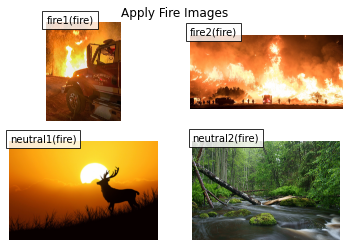

In [ ]:
pred_results = 'Y'
image_collage(imageFolder,2,2,'Apply Fire Images' ,prediction ,  pred_results)


/content/gdrive/MyDrive//Fire_ImageDataSet/ApplySet/fire1.jpg
/content/gdrive/MyDrive//Fire_ImageDataSet/ApplySet/fire2.jpg
/content/gdrive/MyDrive//Fire_ImageDataSet/ApplySet/neutral1.jpg
/content/gdrive/MyDrive//Fire_ImageDataSet/ApplySet/neutral2.jpg


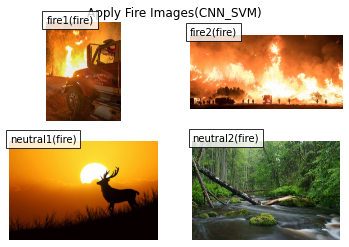

In [ ]:
pred_results = 'Y'
ModelName = 'CNN_SVM'
Title = 'Apply Fire Images'+'('+ ModelName +')'
pred = 0
image_collage(imageFolder,2,2,Title , prediction, pred_results )
